In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
#CDNOW_master.txt


### 第一部分：数据类型处理
- 数据加载
    - 字段含义：
        - user_id:用户ID
        - order_dt:购买日期
        - order_product:购买产品的数量
        - order_amount:购买金额
- 观察数据
    - 查看数据的数据类型
    - 数据中是否存储在缺失值
    - 将order_dt转换成时间类型
    - 查看数据的统计描述
        - 计算所有用户购买商品的平均数量
        - 计算所有用户购买商品的平均花费
    - 在源数据中添加一列表示月份:astype('datetime64[M]')

In [9]:
#数据的加载
df = pd.read_csv('./data/CDNOW_master.txt',header=None,sep='\s+',names=['user_id','order_dt','order_product','order_amount'])
df

,user_id,order_dt,order_product,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id          69659 non-null int64
order_dt         69659 non-null int64
order_product    69659 non-null int64
order_amount     69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [14]:
#将order_dt转换成时间类型
df['order_dt'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id          69659 non-null int64
order_dt         69659 non-null datetime64[ns]
order_product    69659 non-null int64
order_amount     69659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [16]:
#查看数据的统计描述
df.describe()

,user_id,order_product,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


In [20]:
#基于order_dt取出其中的月份
df['order_dt'].astype('datetime64[M]')

0       1997-01-01
1       1997-01-01
2       1997-01-01
3       1997-01-01
4       1997-03-01
5       1997-04-01
6       1997-11-01
7       1997-11-01
8       1998-05-01
9       1997-01-01
10      1997-01-01
11      1997-08-01
12      1997-12-01
13      1997-01-01
14      1997-01-01
15      1997-02-01
16      1997-04-01
17      1997-05-01
18      1997-06-01
19      1997-07-01
20      1997-09-01
21      1997-12-01
22      1997-12-01
23      1998-01-01
24      1997-01-01
25      1997-01-01
26      1997-10-01
27      1998-03-01
28      1997-01-01
29      1997-02-01
           ...    
69629   1997-09-01
69630   1998-01-01
69631   1998-06-01
69632   1997-03-01
69633   1997-03-01
69634   1997-05-01
69635   1997-06-01
69636   1998-02-01
69637   1997-03-01
69638   1997-05-01
69639   1997-06-01
69640   1997-03-01
69641   1997-03-01
69642   1998-01-01
69643   1998-05-01
69644   1997-03-01
69645   1997-03-01
69646   1997-10-01
69647   1997-03-01
69648   1997-05-01
69649   1997-11-01
69650   1997

In [21]:
#在源数据中添加一列表示月份:astype('datetime64[M]')
df['month'] = df['order_dt'].astype('datetime64[M]')
df.head()

,user_id,order_dt,order_product,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


### 第二部分：按月数据分析
- 用户每月花费的总金额
    - 绘制曲线图展示
- 所有用户每月的产品购买量
- 所有用户每月的消费总次数
- 统计每月的消费人数

In [22]:
#用户每月花费的总金额
df.groupby(by='month')['order_amount'].sum()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: order_amount, dtype: float64

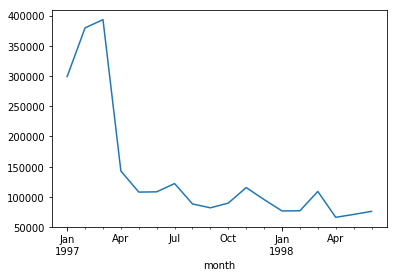

In [24]:
# plt.plot(df.groupby(by='month')['order_amount'].sum())
df.groupby(by='month')['order_amount'].sum().plot()

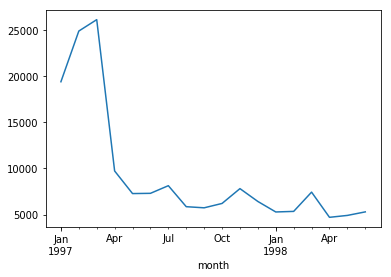

In [26]:
#所有用户每月的产品购买量
df.groupby(by='month')['order_product'].sum().plot()

In [29]:
#所有用户每月的消费总次数(原始数据中的一行数据表示一次消费记录)
df.groupby(by='month')['user_id'].count()

month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: user_id, dtype: int64

In [34]:
#统计每月的消费人数(可能同一天一个用户会消费多次) nunique表示统计去重后的个数
df.groupby(by='month')['user_id'].nunique()

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

### 第三部分：用户个体消费数据分析
- 用户消费总金额和消费总次数的统计描述
- 用户消费金额和消费产品数量的散点图
- 各个用户消费总金额的直方分布图(消费金额在1000之内的分布)
- 各个用户消费的总数量的直方分布图(消费商品的数量在100次之内的分布)

In [43]:
#用户消费总金额和消费总次数的统计描述
df.groupby(by='user_id')['order_amount'].sum() #每一个用户消费的总金额

user_id
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
6         20.99
7        264.67
8        197.66
9         95.85
10        39.31
11        58.55
12        57.06
13        72.94
14        29.92
15        52.87
16        79.87
17        73.22
18        14.96
19       175.12
20       653.01
21        75.11
22        14.37
23        24.74
24        57.77
25       137.53
26       102.69
27       135.87
28        90.99
29       435.81
30        28.34
          ...  
23541     57.34
23542     77.43
23543     50.76
23544    134.63
23545     24.99
23546     13.97
23547     23.54
23548     23.54
23549     27.13
23550     25.28
23551    264.63
23552     49.38
23553     98.58
23554     36.37
23555    189.18
23556    203.00
23557     14.37
23558    145.60
23559    111.65
23560     18.36
23561     83.46
23562     29.33
23563     58.75
23564     70.01
23565     11.77
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: order_amou

In [45]:
#每一个用户消费的总次数
df.groupby(by='user_id').count()['order_dt']

user_id
1         1
2         2
3         6
4         4
5        11
6         1
7         3
8         8
9         3
10        1
11        4
12        1
13        1
14        1
15        1
16        4
17        1
18        1
19        2
20        2
21        2
22        1
23        1
24        2
25        8
26        2
27        2
28        3
29       12
30        2
         ..
23541     2
23542     1
23543     1
23544     3
23545     1
23546     1
23547     2
23548     1
23549     1
23550     1
23551     6
23552     2
23553     2
23554     2
23555     5
23556     7
23557     1
23558     4
23559     3
23560     1
23561     3
23562     1
23563     2
23564     3
23565     1
23566     1
23567     1
23568     3
23569     1
23570     2
Name: order_dt, Length: 23570, dtype: int64

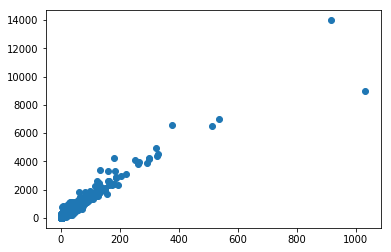

In [49]:
#用户消费金额和消费产品数量的散点图
user_amount_sum = df.groupby(by='user_id')['order_amount'].sum()
user_product_sum = df.groupby(by='user_id')['order_product'].sum()
plt.scatter(user_product_sum,user_amount_sum)

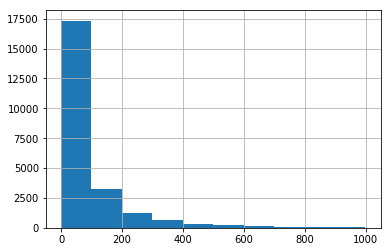

In [53]:
#各个用户消费总金额的直方分布图(消费金额在1000之内的分布)
df.groupby(by='user_id').sum().query('order_amount <= 1000')['order_amount']
df.groupby(by='user_id').sum().query('order_amount <= 1000')['order_amount'].hist()

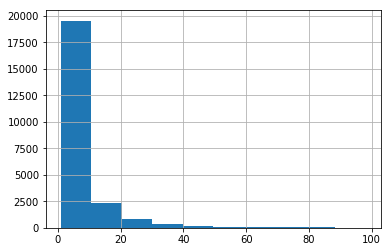

In [57]:
#各个用户消费的总数量的直方分布图(消费商品的数量在100次之内的分布)
df.groupby(by='user_id').sum().query('order_product <= 100')['order_product'].hist()

### 第四部分：用户消费行为分析
- 用户第一次消费的月份分布，和人数统计
    - 绘制线形图
- 用户最后一次消费的时间分布，和人数统计
    - 绘制线形图
- 新老客户的占比
    - 消费一次为新用户
    - 消费多次为老用户
        - 分析出每一个用户的第一个消费和最后一次消费的时间
            - agg(['func1','func2']):对分组后的结果进行指定聚合
        - 分析出新老客户的消费比例
- 用户分层
    - 分析得出每个用户的总购买量和总消费金额and最近一次消费的时间的表格rfm
    - RFM模型设计
        - R表示客户最近一次交易时间的间隔。
            - /np.timedelta64(1,'D')：去除days
        - F表示客户购买商品的总数量,F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。
        - M表示客户交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。
        - 将R，F，M作用到rfm表中
    - 根据价值分层，将用户分为：
        - 重要价值客户
        - 重要保持客户
        - 重要挽留客户
        - 重要发展客户
        - 一般价值客户
        - 一般保持客户
        - 一般挽留客户
        - 一般发展客户
            - 使用已有的分层模型即可rfm_func

In [68]:
#用户第一次消费的月份分布，和人数统计
#第一次消费的月份：每一个用户消费月份的最小值就是该用户第一次消费的月份
df.groupby(by='user_id')['month'].min()

user_id
1       1997-01-01
2       1997-01-01
3       1997-01-01
4       1997-01-01
5       1997-01-01
6       1997-01-01
7       1997-01-01
8       1997-01-01
9       1997-01-01
10      1997-01-01
11      1997-01-01
12      1997-01-01
13      1997-01-01
14      1997-01-01
15      1997-01-01
16      1997-01-01
17      1997-01-01
18      1997-01-01
19      1997-01-01
20      1997-01-01
21      1997-01-01
22      1997-01-01
23      1997-01-01
24      1997-01-01
25      1997-01-01
26      1997-01-01
27      1997-01-01
28      1997-01-01
29      1997-01-01
30      1997-01-01
           ...    
23541   1997-03-01
23542   1997-03-01
23543   1997-03-01
23544   1997-03-01
23545   1997-03-01
23546   1997-03-01
23547   1997-03-01
23548   1997-03-01
23549   1997-03-01
23550   1997-03-01
23551   1997-03-01
23552   1997-03-01
23553   1997-03-01
23554   1997-03-01
23555   1997-03-01
23556   1997-03-01
23557   1997-03-01
23558   1997-03-01
23559   1997-03-01
23560   1997-03-01
23561   1997-03-01
2356

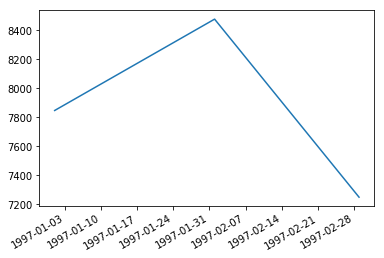

In [70]:
df.groupby(by='user_id')['month'].min().value_counts() #人数的统计
df.groupby(by='user_id')['month'].min().value_counts().plot()

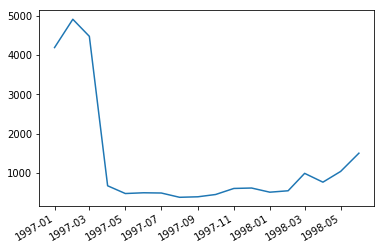

In [73]:
#用户最后一次消费的时间分布，和人数统计
#用户消费月份的最大值就是用户最后一次消费的月份
df.groupby(by='user_id')['month'].max().value_counts().plot()

In [78]:
#新老客户的占比
#消费一次为新用户，消费多次为老用户
#如何获知用户是否为第一次消费？可以根据用户的消费时间进行判定？
    #如果用户的第一次消费时间和最后一次消费时间一样，则该用户只消费了一次为新用户，否则为老用户
new_old_user_df = df.groupby(by='user_id')['order_dt'].agg(['min','max'])#agg对分组后的结果进行多种指定聚合
new_old_user_df['min'] == new_old_user_df['max'] #True新用户，False老用户
#统计True和False的个数
(new_old_user_df['min'] == new_old_user_df['max']).value_counts()

True     12054
False    11516
dtype: int64

In [80]:
#分析得出每个用户的总购买量和总消费金额and最近一次消费的时间的表格rfm
rfm = df.pivot_table(index='user_id',aggfunc={'order_product':'sum','order_amount':'sum','order_dt':"max"})
rfm

,order_amount,order_dt,order_product
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29
6,20.99,1997-01-01,1
7,264.67,1998-03-22,18
8,197.66,1998-03-29,18
9,95.85,1998-06-08,6


In [86]:
#R表示客户最近一次交易时间的间隔
max_dt = df['order_dt'].max() #今天的日期
#每一个用户最后一次交易的时间
-(df.groupby(by='user_id')['order_dt'].max() - max_dt)
rfm['R'] = -(df.groupby(by='user_id')['order_dt'].max() - max_dt)/np.timedelta64(1,'D')

In [88]:
rfm.drop(labels='order_dt',axis=1,inplace=True)

In [91]:
rfm.columns = ['M','F','R']
rfm.head()

,M,F,R
user_id,,,
1,11.77,1,545.0
2,89.00,6,534.0
3,156.46,16,33.0
4,100.50,7,200.0
5,385.61,29,178.0


In [95]:
def rfm_func(x):
    #存储存储的是三个字符串形式的0或者1
    level = x.map(lambda x :'1' if x >= 0 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'
    }
    result = d[label]
    return result
#df.apply(func):可以对df中的行或者列进行某种（func）形式的运算
rfm['label'] = rfm.apply(lambda x : x - x.mean()).apply(rfm_func,axis = 1)
rfm.head()

,M,F,R,label
user_id,,,,
1,11.77,1,545.0,一般挽留客户
2,89.00,6,534.0,一般挽留客户
3,156.46,16,33.0,重要保持客户
4,100.50,7,200.0,一般发展客户
5,385.61,29,178.0,重要保持客户


### 第五部分：用户的生命周期
- 将用户划分为活跃用户和其他用户
    - 统计每个用户每个月的消费次数
    - 统计每个用户每个月是否消费，消费记录为1否则记录为0
        - 知识点：DataFrame的apply和applymap的区别
            - applymap:返回df
            - 将函数做用于DataFrame中的所有元素(elements)
            - apply:返回Series
            - apply()将一个函数作用于DataFrame中的每个行或者列
    - 将用户按照每一个月份分成：
        - unreg:观望用户（前两月没买，第三个月才第一次买,则用户前两个月为观望用户）
        - unactive:首月购买后，后序月份没有购买则在没有购买的月份中该用户的为非活跃用户
        - new:当前月就进行首次购买的用户在当前月为新用户
        - active:连续月份购买的用户在这些月中为活跃用户
        - return:购买之后间隔n月再次购买的第一个月份为该月份的回头客

In [111]:
#统计每个用户每个月的消费次数
user_month_count_df = df.pivot_table(index='user_id',values='order_dt',aggfunc='count',columns='month').fillna(0)

In [112]:
user_month_count_df.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [113]:
#统计每个用户每个月是否消费，消费记录为1否则记录为0
df_purchase = user_month_count_df.applymap(lambda x:1 if x >= 1 else 0)


month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0
9,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [115]:
df_purchase.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [118]:
#将df_purchase中的原始数据0和1修改为new，unactive......,返回新的df叫做df_purchase_new
#固定算法
def active_status(data):
    status = []#某个用户每一个月的活跃度
    for i in range(18):
        
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
                    
        #若本月消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status

pivoted_status = df_purchase.apply(active_status,axis = 1) 
pivoted_status.head()

user_id
1    [new, unactive, unactive, unactive, unactive, ...
2    [new, unactive, unactive, unactive, unactive, ...
3    [new, unactive, return, active, unactive, unac...
4    [new, unactive, unactive, unactive, unactive, ...
5    [new, active, unactive, return, active, active...
dtype: object

In [139]:
df_purchase_new = DataFrame(data=pivoted_status.values.tolist(),index=df_purchase.index,columns=df_purchase.columns)
df_purchase_new

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
6,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
7,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive
8,new,active,unactive,unactive,unactive,return,active,unactive,unactive,unactive,return,active,unactive,unactive,return,unactive,unactive,unactive
9,new,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return


- 每月【不同活跃】用户的计数
    - purchase_status_ct = df_purchase_new.apply(lambda x : pd.value_counts(x)).fillna(0)
    - 转置进行最终结果的查看


In [140]:
purchase_status_ct = df_purchase_new.apply(lambda x : pd.value_counts(x)).fillna(0)
purchase_status_ct

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
active,0.0,1157.0,1681.0,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
return,0.0,0.0,595.0,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,0.0,6689.0,14046.0,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0
unreg,15724.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
purchase_status_ct.T

,active,new,return,unactive,unreg
month,,,,,
1997-01-01,0.0,7846.0,0.0,0.0,15724.0
1997-02-01,1157.0,8476.0,0.0,6689.0,7248.0
1997-03-01,1681.0,7248.0,595.0,14046.0,0.0
1997-04-01,1773.0,0.0,1049.0,20748.0,0.0
1997-05-01,852.0,0.0,1362.0,21356.0,0.0
1997-06-01,747.0,0.0,1592.0,21231.0,0.0
1997-07-01,746.0,0.0,1434.0,21390.0,0.0
1997-08-01,604.0,0.0,1168.0,21798.0,0.0
1997-09-01,528.0,0.0,1211.0,21831.0,0.0
